# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
#Pkg.update()
#Pkg.add("DualNumbers")
using DualNumbers
using PyPlot

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.



From Talor's expansion and lecture notes we can obtain that for a suffiently smooth function $f$,

$$f(x+h)=f(x)+hf'(x)+\frac{h^2 f''(x)}{2}+O(h^3),$$
and
$$f(x+2h)=f(x)+2hf'(x)+\frac{(2h)^2 f''(x)}{2}+O(h^3)=f(x)+2hf'(x)+2h^2 f''(x)+O(h^3).$$

Now we want to find suitable $a,b,c\in \mathbb{R}$ such that
$$f'(x)=\frac{af(x)+bf(x+h)+cf(x+2h)}{h}+O(h^2)$$
holds. Indeed we have for any $a,b,c\in \mathbb{R}$ that
 \begin{align*}
 &af(x)+bf(x+h)+cf(x+2h)\\
 =& af(x)+bf(x)+bhf'(x)+b\frac{h^2 f''(x)}{2}+cf(x)+2chf'(x)+2ch^2 f''(x)+O(h^3)\\
 =& (a+b+c)f(x)+(b+2c)hf'(x)+\big(\frac{b}{2}+2c\big)h^2f''(x)+O(h^3).
 \end{align*}


To keep the term involving $f'(x)$ only, we need $a+b+c=0$, $b+2c=1$ and $\frac{b}{2}+2c=0$. This implies $a=-\frac{3}{2}$ $b=2$ and $c=-\frac{1}{2}$. Thus we have arrived at
$$-\frac{3}{2}f(x)+2f(x+h)-\frac{1}{2}f(x+2h)=hf'(x)+O(h^3).$$
Rearranging the terms and dividing both side by $h$ yields
$$f'(x)=\frac{-3f(x)+4f(x+h)-f(x+2h)}{2h}+O(h^2).$$


**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

It is easy to compute that $f'(x)=\cos(\exp(x))\exp(x)$. Thus $f'(1)=\cos(\exp(1))\exp(1)$. In the following we shall define two functions which return the true value of $f$ and the derivative of $f$ respectively.

In [2]:
function f(x) # this will be used for dual number and float64 number
    f=sin(exp(x))
    return f
end

f (generic function with 1 method)

In [3]:
function fdot(x::Float64)
    fdot=cos(exp(x))*exp(x)
    return fdot 
end

fdot (generic function with 1 method)

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?


According to discussion above on 3-point stencil, we may define an function for approximating the derivative of the targeted function. 

In [4]:
function approxfdot(x::Float64,h::Float64)
    deriv=(-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
end

approxfdot (generic function with 1 method)

Then we try to approximate the derivative of $f$ at point $1$ via different meshsizes, say, $h$ decreasing from $2^{-1}$ to $2^{-30}$. At each meshsize level, we compare the approximated derivative and true derivative in terms of absolute distance. Finally we plot error against meshsize to monitor the performance of the proposed function for derivative approximation with 3-point stencil. 

In [5]:
# errors of the approximation of derivatives via 3-point stencil for different h
error=zeros(Float64,length(1:30))
for i=1:30
    h=2.0^(-i)
    error[i]=abs(approxfdot(1.0,h)-fdot(1.0))
end

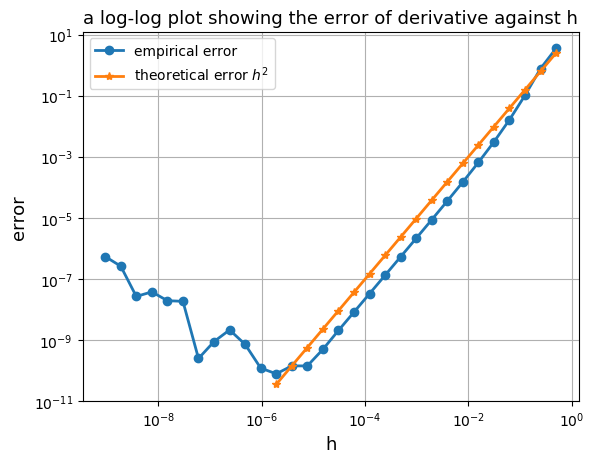

In [10]:
h_vec=2.0.^(-(1:30))
plot(h_vec,error,marker="o",markersize=6,linewidth=2,label="empirical error")
plot(h_vec[1:19],10*h_vec[1:19].^2,marker="*",markersize=6,linewidth=2,label=L"theoretical error $h^2$")
xscale("log")
yscale("log")
xlabel("h",fontsize=13)
ylabel("error",fontsize=13)
title("a log-log plot showing the error of derivative against h",fontsize=13)
legend()
grid()
show()

The trend of error coincides with that of theoretical error, scaled $h^2$ when there is the negligible round-off error. This verifies the theoretically predicted scaling of the error with h.

As |relative error| = |error|/|true value|, we only need to find the minimum true error to find the best relative error.

In [7]:
min_index=findmin(error)[2];
min=findmin(error)[1];
min_relative=min/abs(fdot(1.0));
println(min_index)
println(min)
println(min_relative)

19
8.019451769314401e-11
3.2358031082852225e-11


The best relative error I can achieve is $3.2358031082852225\times 10^{-11}$.

From the plot we can see, at the first stage error slides as $h$ decays. Then after $h$ reaches as small as $2^{-18}$, error tends to increase. When $h$ is not too small, numerical error dominates and as $h$ tends to be relatively smaller, the error slides because numerical error becomes smaller. After $h$ becoming sufficiently small, round-off error dominates and when $h$ is even smaller, round-off error grows which leads to the increse in error.    

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

Due to property of $\epsilon$, we have $f(1+\epsilon)=f(1)+\epsilon f'(1)+0$. Then we call DualNumbers.jl with appropriate pair of inputs and got result for derivative.

In [8]:
diff1=f(Dual(1,1))-f(1)
deriv1=dualpart(diff1)

-2.478349732955235

Therefore, $f'(1)=-2.478349732955235$.

In [9]:
deriv1==fdot(1.0)

true

Here we compare directly the derivative from calling derivative function and the one computed with dual number. They are treated as identified thus the difference between them is within machine precision.